# Fisher’s Iris data set analysis using Python

This data set also known as [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) which was published by British statistician and biologist [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936 in his paper "The use of multiple measurements in taxonomic problems". He introduced it as an example of linear discriminant analysis which he proposed as a method to predict qualitative values. Fisher used this method to be able to separate different types of Iris flowers from each other based on four characteristics (measurements) of the flowers. It has became one of the classic data sets and has been used extensively in the statistical literature and as a testcase in various mathematic and scientific disciplines.


The original Iris data was collected by [Edgar Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson), an American botanist. Who was interested in quantifying the morphologic variation of Iris flowers of three related species. He was trying to find out how one species of Iris could have evolved from another. In 1936 he published a manuscript ["The Species Problem in Iris"](https://ia902305.us.archive.org/1/items/biostor-11559/biostor-11559.pdf) where he provides detailed overview of the species and their origin. He noted that there is a noticeable difference in the seed size between three Iris species, in addition to the difference in the sizes of their petals and sepals.

 

The data set consists of 150 records (50 for each of the three Iris species: Iris setosa, Iris versicolor and Iris virginica ) Each species in turn have four attributes which were measured: the length and the width of the sepals and petals in centimeters. The samples from the setosa and versicolar were all collected on the same day from the same field by the same person using the same equipment. The third species was collected elsewhere.<br>

![title](Images/flowers.png)
(Sources: [1](https://commons.wikimedia.org/wiki/Category:Iris_setosa#/media/File:Irissetosa1.jpg), [2](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_versicolor_3.jpg), [3](https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_virginica.jpg), Licenses: Public Domain)

<br>

## Saving original data set
***

In [1]:
# First of all before performing any analyses on the data set we need to import all the necessary modules  
# which we going to use in this project.

# For downloading.
from urllib.request import urlretrieve

# For numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# For plotting.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Now we need to download the data, it is freely available from the UC Irvine Machine Learning Repository
# Assigning url of file. Idea taken from https://gist.github.com/curran/a08a1080b88344b0c8a7
iris='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Saving file locally.
urlretrieve(iris)

# Read file into a pandas DataFrame and assign column names. 
df = pd.read_csv(iris, sep=',', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
# Prints dataframe head(first 10 elements)
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [3]:
# Checking that whole data set has been imported (150 rows).
len(df)

150

<br>

## Looking at data

***
Before we start analysing the data set lets have a look at the data more closely using pandas functionality.

We can use <span style="color:SlateBlue; font-weight:bold;">columns</span> attribute to show the column labels of the DataFrame. <br>
Next, <span style="color:SlateBlue; font-weight:bold;">index</span> attribute shows RangeIndex(start, stop, step), index was automatically assigned when the csv file was read and df was created.<br>
<span style="color:SlateBlue; font-weight:bold;">ndim</span> parameter shows the number of axes/dimensions of the data set.<br>
<span style="color:SlateBlue; font-weight:bold;">shape</span> attribute can be used to show the number of rows (if used with index 0) and columns (if used with index 1) in the data set.<br>
<span style="color:SlateBlue; font-weight:bold;">size</span> attribute shows total number of elements in the DataFrame (150 rows x 5 columns = 750).<br>
<span style="color:SlateBlue; font-weight:bold;">dtypes</span> attribute shows the data types of the DataFrame.

In [4]:
print("The column names of the Iris data set are: ", *df.columns, sep = "   ")
print("The index of the DataFrame is: ", df.index, "\n")
print(f"Iris DataFrame is {df.ndim} dimensional")
print(f"It consists of {df.shape[0]} rows and {df.shape[1]} columns")
print(f"The Iris DataFrame has {df.size} elements in total", "\n")
print("The data in the DataFrame is the following type:")
print(df.dtypes)

The column names of the Iris data set are:    sepal_length   sepal_width   petal_length   petal_width   class
The index of the DataFrame is:  RangeIndex(start=0, stop=150, step=1) 

Iris DataFrame is 2 dimensional
It consists of 150 rows and 5 columns
The Iris DataFrame has 750 elements in total 

The data in the DataFrame is the following type:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object


Now lets check if there are any missing values in our data, which we can easily do by using <span style="color:SlateBlue; font-weight:bold;">isnull</span> method which returns True or False values for each observation. Boolean values can be converted to 1 (True) or 0 (False) we can then combine it with the **sum** function to count the number of True values in the data set instead of printing all of the True or False values. After looking at the result we can confrim that there are no missing values in this data set.

In [5]:
print("The number of null / missing values in the Iris dataframe for each column: ")
print(df.isnull().sum())

The number of null / missing values in the Iris dataframe for each column: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


The <span style="color:SlateBlue; font-weight:bold;">info</span> method produses concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.<br>
The <span style="color:SlateBlue; font-weight:bold;">count</span> method counts non-NA cells for each column or row.<br>
The <span style="color:SlateBlue; font-weight:bold;">unique</span> method returns unique values based on a hash table. If we use it on the 'class' column it will show how many different species of Iris flower are in our data set.

In [6]:
print(f"A concise summary of the iris DataFrame: \n")
df.info()
print(f"\nThe number of non-NA cells for each column or row are:\n{df.count()}")
species_type =df['class'].unique()
print("\nThe following are the three classes or species types of Iris flowers in the data set: \n",*species_type, sep = " ")

A concise summary of the iris DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

The number of non-NA cells for each column or row are:
sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
class           150
dtype: int64

The following are the three classes or species types of Iris flowers in the data set: 
 Iris-setosa Iris-versicolor Iris-virginica


### A bit of statistics 
***
Pandas data frame has a very convinient way of producing a summary of the data set, so instead of usign separate methods like max, min, std (standart deviation) we can just use **describe** function. This method also shows 25th, 50th and 75th percentiles. The 50 percentile is the same as the median.

In [7]:
print("Summary statistics for the Iris DataFrame: \n")
print(df.describe())

Summary statistics for the Iris DataFrame: 

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Saving summary to the text file. This is used in the analysis.py file 

 To set the decimal point number to 2
pd.set_option('display.precision', 2)
summary = df.describe()
    with open('data/summary.txt', 'w') as f:
    f.write(str(summary))

In [8]:
# We can also perform summary analysis on Iris flowers depending on their class. 
sumByClass = df.groupby('class').describe()
sumByClass

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
class                               ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [9]:
# As the above table is hard to read, lets split the table into 3 separate ones, each for one of Iris flower class.
sumSetosa = df[df['class'] == 'Iris-setosa'].describe()
sumSetosa

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [10]:
sumVersicolor = df[df['class'] == 'Iris-versicolor'].describe()
sumVersicolor

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [11]:
sumVirginica = df[df['class'] == 'Iris-virginica'].describe()
sumVirginica

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


After looking at the results of the tables above we can easily deduce the following: <br>
 - Mean petal length and width for Setosa flowers is much lower than the other two species with 1.46 and 0.24 cm respectively. <br>
 - Setosa also has the highest mean sepal width 3.42 cm <br> 
 - Class Virginica has the highest mean of both petal length 5.55 cm and petal width 2.03 cm, with the highest max petal length of 6.9 cm and max petal width 2.5 cm. <br>
 - Standard deviation when looking at each class separately is much lower as expected, suggesting much less variance between species of the same class.

## Visualising the data
***

Best way to understand the relation between variables is to see it on the plot, therefore as a next step in our analysis we going to create a few plots in the attempts to find out the correlation and dependencies between different Iris species in our data set.<br>

### Histograms
***
**Histograms** are a great way to see the distribution of data for various columns. The pandas **hist** function calls matplotlib.pyplot.hist on each numerical series in the DataFrame, resulting in one histogram per column. By specifying bins parameter we can choose how detailed the plot will be. The height of each bin shows how many values from that data fall into that range. [5]

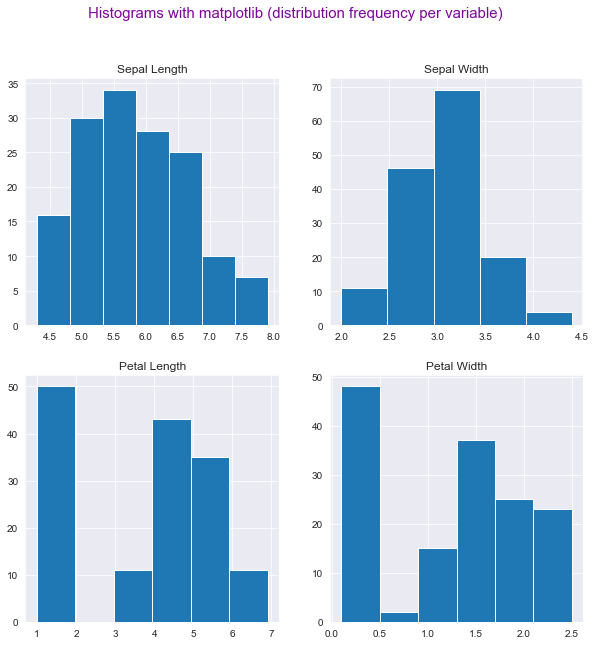

In [12]:
# setting global grid style
sns.set_style("darkgrid")

# Creating 4 histograms on a 2x2 grid, customising figure size.
fig, axes = plt.subplots(2, 2, figsize=(10,10))
# Specifiyng params of the plots and it's location on the grid.  
axes[0,0].set_title("Sepal Length") # adding title to idividual graph
axes[0,0].hist(df['sepal_length'], bins=7) # choosing the number of equal-width bins/buckets 
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal_width'], bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal_length'], bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal_width'], bins=6);

# setting title, specifying fontsize and colour
fig.suptitle('Histograms with matplotlib (distribution frequency per variable)', fontsize=15, color='#7F069C')
plt.show()

From the plot above we can see that:
- Sepal length peak somewhere between 5.5 and 6 cm with about 35 measurements falling into that bin
- Sepal width frequesncy is the highrst between 3.0 -3.5 cm with about 70 measurements
- For Petal length the peak is between 1-2 cm with about 50 measurements
- For Petal width the highest frequency falls up to 0.5 cm  with about 50 measurements as well


Even though matplotlib histogram gives us a good idea of overall distribution among those 4 variables, it would be nice to see which Iris species fall into which bin. For that kind of graph I found is ideal to use seaborn.[6] <br>

Below we create 4 histograms with seaborn, adding **hue** (so each class will be in different colour, <br>
**KDE curve** - kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s), <br> 
This time instead of specifying number of bins we can choose **binwidth** - width of each bin, <br>
**alpha** - transparency, <br>
axs[row,column] - choosing location on the grid <br>
https://seaborn.pydata.org/generated/seaborn.histplot.html <br>
We can also change the appearance of ticks, tick labels their size with **tick_params** <br>
https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.tick_params.html

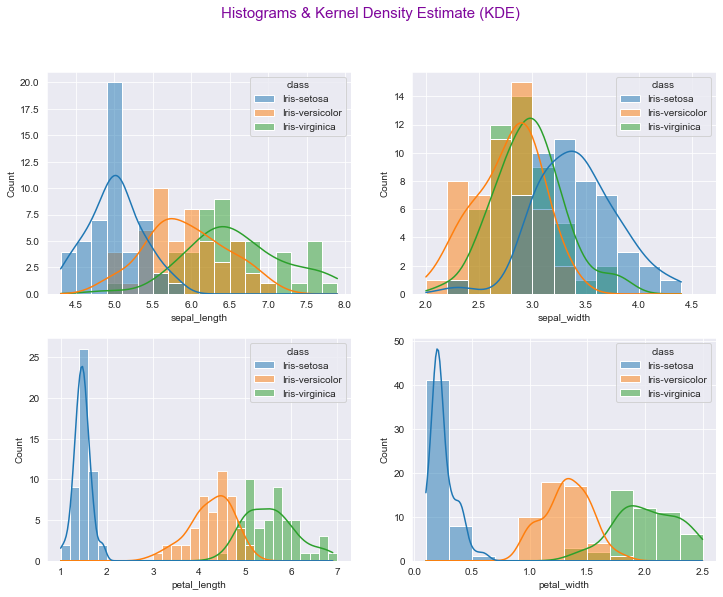

In [13]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(12, 9)
sns.histplot(data=df, x='sepal_length', binwidth=0.2, hue='class', kde=True, alpha=0.5, ax=axs[0,0]).tick_params(axis='both', which='major', labelsize=10)
sns.histplot(data=df, x='sepal_width', binwidth=0.2, hue='class', kde=True, alpha=0.5,  ax=axs[0,1]).tick_params(axis='both', which='major', labelsize=10)
sns.histplot(data=df, x='petal_length', binwidth=0.2, hue='class', kde=True, alpha=0.5, ax=axs[1,0]).tick_params(axis='both', which='major', labelsize=10)
sns.histplot(data=df, x='petal_width', binwidth=0.2, hue='class', kde=True, alpha=0.5, ax=axs[1,1]).tick_params(axis='both', which='major', labelsize=10)
plt.suptitle('Histograms & Kernel Density Estimate (KDE)', fontsize=15, color='#7F069C')
plt.show()

From the plots above we can see that for both sepal length and sepal width charts there is a lot of overlapping, as for the petal length and width there is much less overlapping and Setosa species in particular is very distinct from the other two species.

### Boxplots
***
Another excellent way of getting overall impression of the data is using <span style="color:SlateBlue; font-weight:bold;">Boxplots</span>. "Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”)." <br>
I found article ["Understanding Boxplots"](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) to be very useful in understanding and interpreting boxplots. <br>
The length of the box is the interquartile range (Q1- Q3). The interquartile range (IQR) is the middle 50% (75% -25%) of the data and can show the spread or variation of the data. The whiskers show if the data is skewed in one direction or the other.    <br>

First, let's have a look on the overall combined data for all classes.

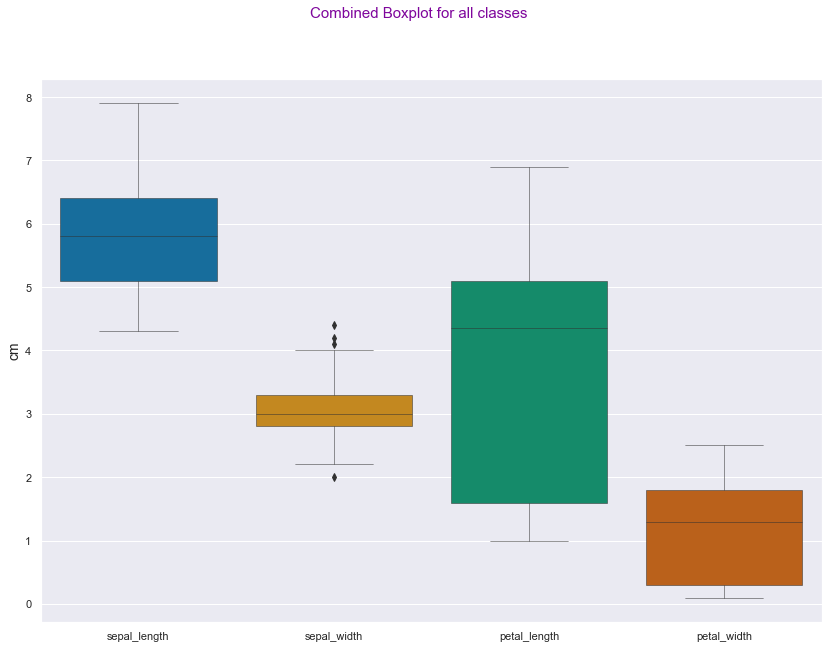

In [24]:
# Creating a boxplot, with defined line size and colour palette 
p = sns.boxplot( data = df, linewidth=0.5, palette='colorblind')
sns.set(rc={'figure.figsize':(14,10)}) # defining size of the plot
p.set_ylabel("cm", fontsize=14) # adding y label
# adding title and specifying color and font size 
plt.suptitle('Combined Boxplot for all classes', fontsize=15, color='#7F069C') 
plt.show()

From the plot above we can see relative dimensions for each of four attributes. Petal_width has the smallest individual value and lowest median opposite to sepal_length, which has the greatest individual value, and highest median. Sepal_width has the narrowest range of values but quite a few outliers, petal_length on the other hand has the greatest dispersion. All of which is confirming the analysis we performed above but is much easier to appreciate when presented as a graph instead of text. Sepal_length is the closest to a normal distribution as all of 4 quartiles are relatively even there, which can't be said about the rest of the attributes, especially both petal dimensions are quite skewed.  <br>

Now we can have a look at each class individually to get a more detailed picture.

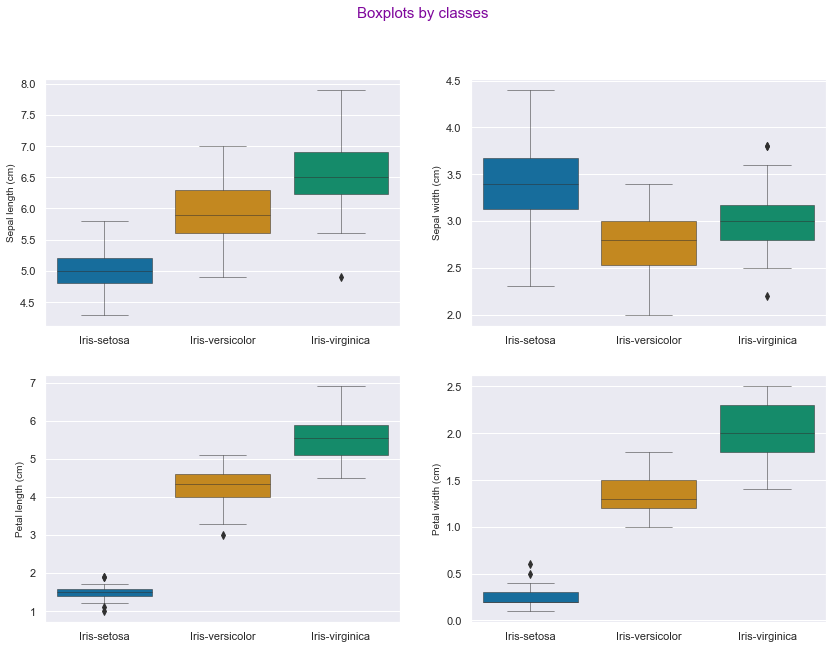

In [15]:
f, axes = plt.subplots(2,2, figsize=(14,10)) # this produces a 2x2 grid of boxplots
# there are 4 boxplots. axes[0,0] refers to position on grid [row, column]
# line size and colour palette defined
sns.boxplot(x = 'class', y='sepal_length', data = df, ax=axes[0,0], linewidth=0.5, palette='colorblind')
sns.boxplot(x = 'class', y='sepal_width', data = df, ax=axes[0,1], linewidth=0.5, palette='colorblind')
sns.boxplot(x = 'class', y='petal_length', data = df, ax=axes[1,0], linewidth=0.5, palette='colorblind')
sns.boxplot(x = 'class', y='petal_width', data = df, ax=axes[1,1], linewidth=0.5, palette='colorblind')
# setting x and y labels. Empty string on x axes as names of the flower classes are already specified and it will 
# only create more clutter
axes[0,0].set_xlabel(" ")
axes[0,0].set_ylabel("Sepal length (cm)", fontsize=10)
axes[0,1].set_xlabel(" ")
axes[0,1].set_ylabel("Sepal width (cm)", fontsize=10 )
axes[1,0].set_xlabel(" ")
axes[1,0].set_ylabel("Petal length (cm)", fontsize=10)
axes[1,1].set_xlabel(" ")
axes[1,1].set_ylabel("Petal width (cm)", fontsize=10)
# title and formatting
f.suptitle('Boxplots by classes', fontsize=15, color='#7F069C')
plt.show()

From the plots above we can see that Setosa becomes very distinct from the others, particularly in terms of petal length and width. The other two species are also somewhat different in both petal attributes. For the sepal however there is a good bit of overlapping.

### Violinplots
***
Another alternative to a boxplot is a **violinplot**. "*Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.*" https://en.wikipedia.org/wiki/Violin_plot <br>
I found ["A Complete Guide to Violin Plots"](https://chartio.com/learn/charts/violin-plot-complete-guide/) to be very informative and short enough to read and get a good idea about those kind of plots.

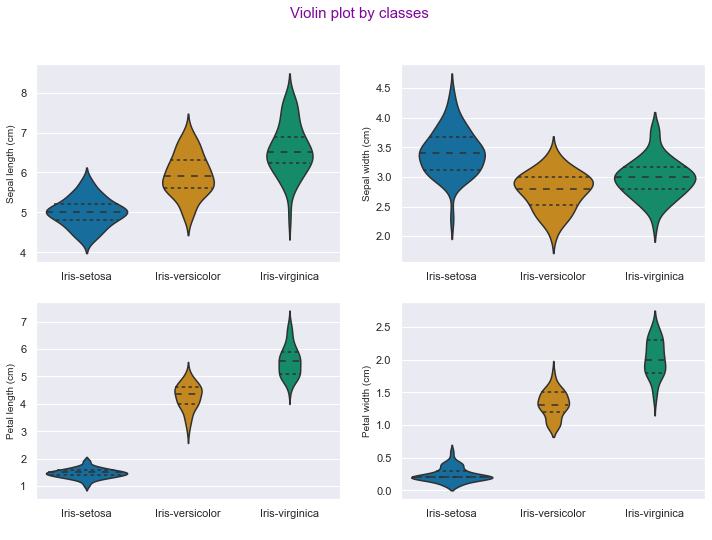

In [16]:
 # this produces a 2x2 grid of violinplots, specifying size of the plots
fig, axes = plt.subplots(2, 2, figsize=(12,8))
# there are 4 violinplots. axes[0,0] refers to position on grid [row, column]
# inner='quartile' draws the quartiles of the distribution, and colour palette defined
sns.violinplot(x = 'class', y='sepal_length', data = df, ax=axes[0,0], palette='colorblind', inner='quartile')
sns.violinplot(x = 'class', y='sepal_width', data = df, ax=axes[0,1], palette='colorblind', inner='quartile')
sns.violinplot(x = 'class', y='petal_length', data = df, ax=axes[1,0], palette='colorblind', inner='quartile')
sns.violinplot(x = 'class', y='petal_width', data = df, ax=axes[1,1], palette='colorblind', inner='quartile')
# setting x and y labels. Empty string on x axes as names of the flower classes are already specified and it will only 
#create more clutter
axes[0,0].set_xlabel(" ")
axes[0,0].set_ylabel("Sepal length (cm)", fontsize=10)
axes[0,1].set_xlabel(" ")
axes[0,1].set_ylabel("Sepal width (cm)", fontsize=10 )
axes[1,0].set_xlabel(" ")
axes[1,0].set_ylabel("Petal length (cm)", fontsize=10)
axes[1,1].set_xlabel(" ")
axes[1,1].set_ylabel("Petal width (cm)", fontsize=10)
# title and formatting
fig.suptitle('Violin plot by classes', fontsize=15, color='#7F069C')
plt.show()

Even though we can get the same conclusions from the violin plot as from boxplot, I found it to be more informative as it's also shows the full distribution of the data. And if we now look at the overall data for all the classes combined, we can see that there are two peaks in both petal attributes suggesting that there is some discrimination between the classes, which we couldn't see with the boxplot.

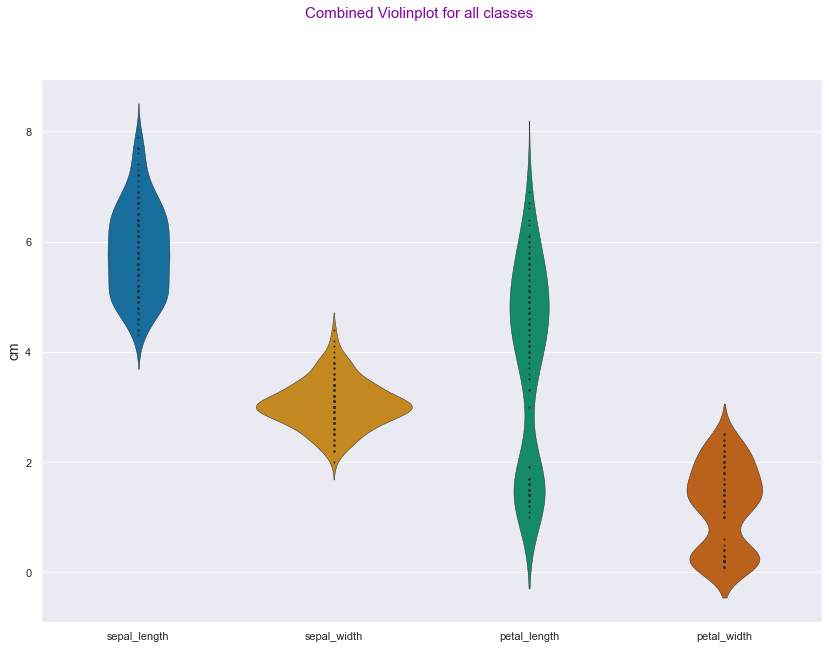

In [17]:
# Creating a violinplot, with defined line size and colour palette, inner='point' show each underlying datapoint 
p = sns.violinplot( data = df, linewidth=0.5, inner='point', palette='colorblind')
sns.set(rc={'figure.figsize':(14,10)}) # defining size of the plot
p.set_ylabel("cm", fontsize=14) # adding y label
# adding title and specifying color and font size 
plt.suptitle('Combined Violinplot for all classes', fontsize=15, color='#7F069C') 
plt.show()

### Scatter plots
***
A **scatter plot** is very useful and commonly used plot which shows how variables in the data set correlate with each other. It provides the possibility to perform **bivariate or multivariate analysis**. One variable is plotted on the x-axis while the other variable is plotted on the y-axis. <br>

First, let's have a look at the relationship between the sepal length and sepal width. Code reference [3]

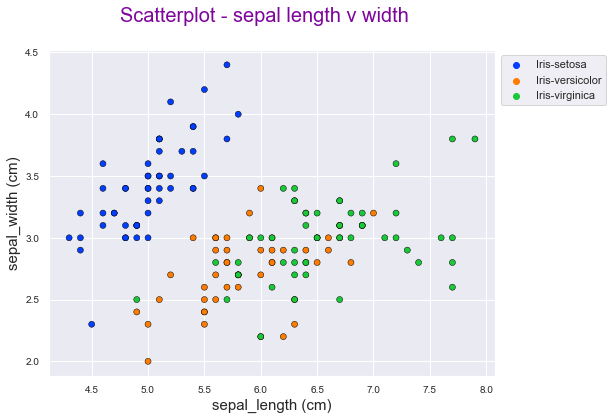

In [18]:
# we can choose different color pallets, example https://seaborn.pydata.org/tutorial/color_palettes.html
sns.color_palette("bright")
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='class', data=df, edgecolor='black', palette="bright")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel("sepal_length (cm)", fontsize=15)
plt.ylabel("sepal_width (cm)", fontsize=15)
plt.suptitle('Scatterplot - sepal length v width', fontsize=20, color='#7F069C')
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

From the plot above we can see that the species Seotsa is very different compared to the other two species and is clearly distinguishable which is indeed has been confirmed many times before from various investigations into the data set. Iris-versicolor and Iris-virginica on the other hand have a lot of overlapping points which makes it difficult to separate them.

Here are the conculsions we can make from the plot above:
 - Iris-setosa species has smaller sepal lengths (not greate than 6.0 cm) but larger sepal widths(not less than 2.3 cm, with majority being around 3.4 cm).
 - Iris-virginica on the other hand is opposite of setosa species and has larger sepal lengths (not less than 6.0 cm ) but smaller sepal widths (not greater than 3.8 cm).
 - Iris-versicolor species falls somewhere in the middle of the other two species in terms of sepal length (not less than 5.0 cm) and width (not greater than 3.4 cm).
 <br>
 
 Now, lets compare petal length and petal width

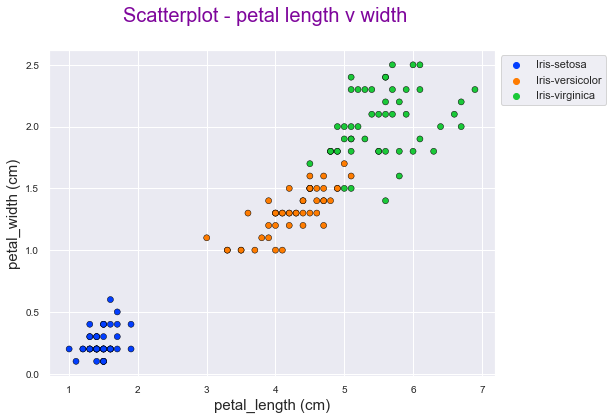

In [19]:
sns.scatterplot(x='petal_length', y='petal_width',
                hue='class', data=df, edgecolor='black', palette="bright")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel("petal_length (cm)", fontsize=15)
plt.ylabel("petal_width (cm)", fontsize=15)
plt.suptitle('Scatterplot - petal length v width', fontsize=20, color='#7F069C')
    
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

Here are the conculsions we can make from the plot above:
- Iris-setosa has both smaller petal lengths (not greater than 2 cm) and widths (not greater than 0.6 cm).
- Iris-virginica is again the opposite of Setosa and has the largest of petal lengths (not less than 4.5 cm) and widths (not less than 1.4 cm).
- Iris-versicolor species once again is in the middle of the other two species in terms of petal length and width.


### Pairplot and pairgrid
***
**pairplot** function in seaborn is an excellent way of showing the correlation between different variables, a scatter plot of each pair of variables is created in a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. On the diagonal a univariate distribution plot is drawn to show the marginal distribution of the data in each column. [4]

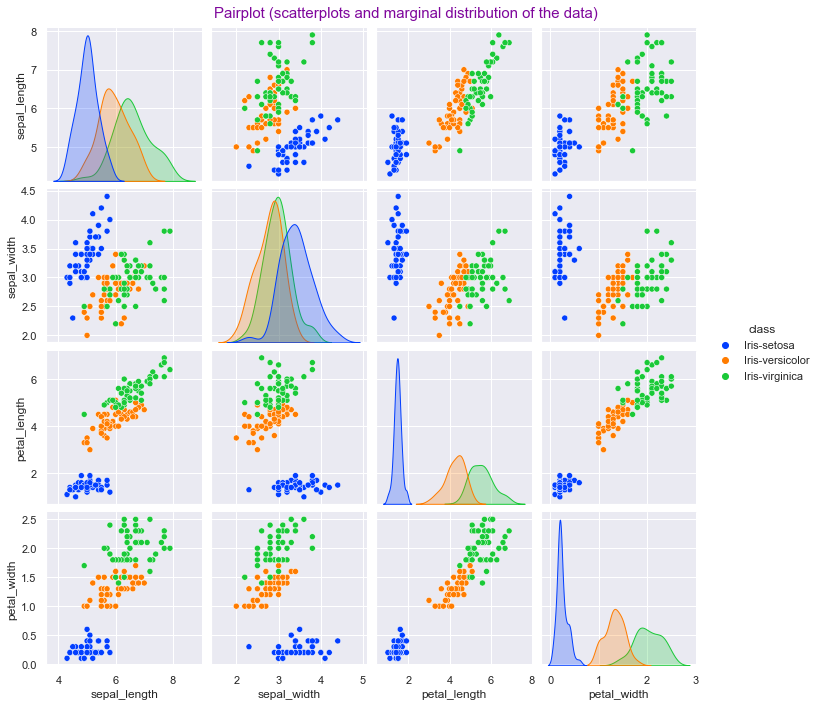

In [20]:
sns.pairplot(data=df, hue='class', palette="bright")
plt.subplots_adjust(top=.95) # creates space above the plot for the title 
plt.tick_params(axis='both', which='major', labelsize=5) # formats ticks
# sets title with formatting
plt.suptitle('Pairplot (scatterplots and marginal distribution of the data)', fontsize=15, color='#7F069C')
plt.show()

We can create similar graph with **pairgrid** function which gives some extra flexibility compared to pairplot as we can use different visualisations in upper and lower triangles. As example we can use kdeplot instead of scatterplot this time that uses probability estimation to create a smooth curve. And on the diagonal we can put stack histogram with step instead of the default one.

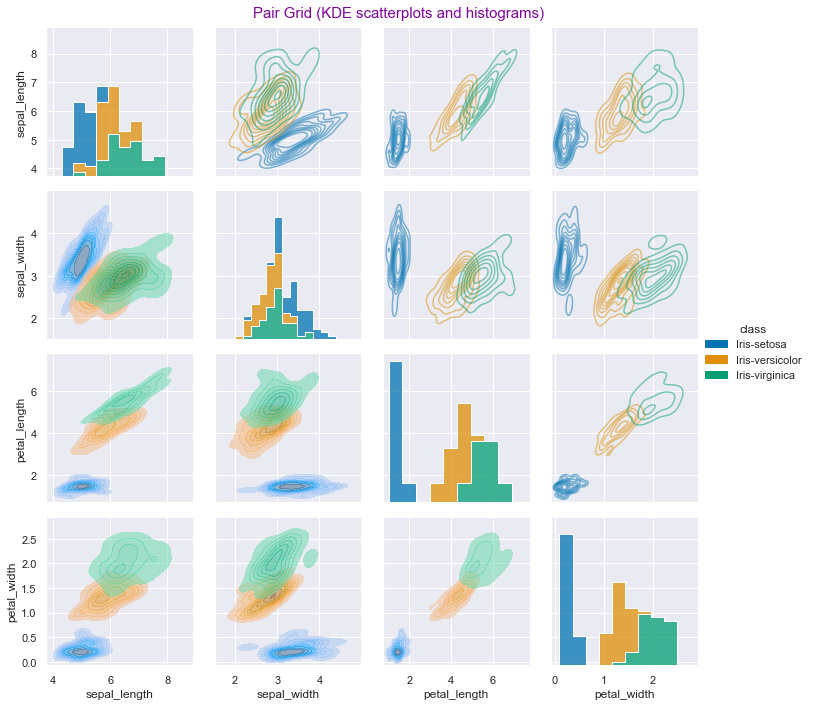

In [21]:
# creating pairgrid with KDE 
pg = sns.PairGrid(df, hue = 'class', palette='colorblind')
pg.map_upper(sns.kdeplot, alpha=0.5) # creates KDE without shade above the diagonal. aplha=0.5 so we can see through
pg.map_lower(sns.kdeplot, shade=True, alpha=0.5) # creates KDE with shade below the diagonal.
pg.map_diag(sns.histplot, multiple="stack", element="step") # stacked histogram on the diagonal
plt.subplots_adjust(top=.95) # creates space above the plot for the title
plt.tick_params(axis='both', which='major', labelsize=5) # sets ticks
# sets title and formatting
plt.suptitle('Pair Grid (KDE scatterplots and histograms)', fontsize=15, color='#7F069C')
pg.add_legend(bbox_to_anchor=(1, 0.5)) # defines legend location
plt.show()

### Correlation and heatmap
***
"**Correlation** is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate)" https://www.jmp.com/en_ca/statistics-knowledge-portal/what-is-correlation.html <br>
 Correlation is described using unit-free measure called the **correlation coefficient** which ranges from -1 to +1, The closer it is to zero, the weaker the linear relationship. Positive correlation coefficient values indicate a positive correlation, where the values of both variables tend to increase together. Negative on the other hand indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease. <br>
We can easily get correlation between the measurements bye using pandas `corr` method:

In [27]:
print("\tCorrelation between pairs of variables for the Iris dataset \n")
print(df.corr())

	Correlation between pairs of variables for the Iris dataset 

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


Finally we can visualise this correlation with the help of Heatmap plot

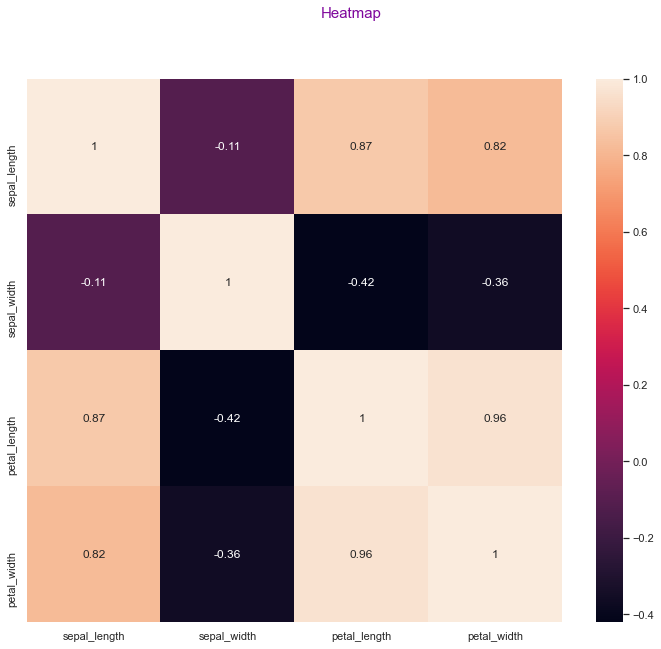

In [22]:
# Next lets build a heatmap which is based on correlation between attributes.
plt.figure(figsize=(12,10)) # customising figure size
# annot=True shows the values on each square
sns.heatmap(df.corr(), annot=True)
plt.suptitle('Heatmap', fontsize=15, color='#7F069C')
plt.show()

From the above plot we can see the correlation between variables, the darker areas represet the least correlation and vice versa. There is a high correlation between petal attributes, while for sepals it's the opposite. Also, there is high correlation between sepal length and both petal attributes.

### References <br>

1. [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)<br>
2. [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher)<br>
3. [Edgar Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson)<br>
4. ["The Species Problem in Iris"](https://ia902305.us.archive.org/1/items/biostor-11559/biostor-11559.pdf)
3. (geeksforgeeks.org)[https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/]
4. https://seaborn.pydata.org/generated/seaborn.pairplot.html
5. https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html
6. https://seaborn.pydata.org/generated/seaborn.histplot.html
"Understanding Boxplots" (https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)